# Phase fraction
This is an example notebook on how to use the software package for the phase fraction fitting.
The dataset is composed of cruciform stainless steel sample treated with load path change, with phase transformation from FCC (-γ) to BCC(-α) structures. 
The data is pre-processed and reduced to a transmission 3D-array with dimension (pixel_x,pixel_y,lambda).

# Importing python modules and functions

In [1]:
#some basic python modules
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import h5py
import fnmatch
from os import listdir
from PIL import Image

#if you cloned your directory:
import sys
#update the following line to the downloaded software location
sys.path.append('C:\\Users\\busi_m\\Workspace\\neutronimaging\\ToFImaging\\src\\')

#if you installed via pipinstall you only need this part
import tofimaging.PhaseFitting as pfit
import tofimaging.Data as data

# Loading Data and preparing for the fits
Please download the two files at the following link (will be updated ASAP) and update the path to them in the lines 2 and 4 below.

## Loading experimental data 

In [2]:
# loading data
path = 'C:\\Users\\busi_m\\Workspace\\Projects\\ESS_Software\\phase\\LPC\\4-sigma_sample2\\'
files = sorted(fnmatch.filter(listdir(path),'*.tif'))
T = np.zeros((1024,1024,51))
for i in range(0,len(files)):
    T[:,:,i] = Image.open(path+'\\'+files[i])

# loading a pre-defined mask
arrays={}
mask = h5py.File('C:\\Users\\busi_m\\Workspace\\Projects\\ESS_Software\\phase\\LPC\\mask.mat','r')['mask']
mask = np.asarray(mask)
mask = mask.transpose((1,0))

# defining spectral range
spectrum = np.linspace(2.5,4.5,51)

## Loading reference phase spectra

The Data.py modules contains some useful typical cross sections. For this example we load the gamma and alpha phases of stainless steel 316L. Note that these functions load a three column matrix where the first column is wavelength, second is coherent elastic cross sections, third is all the remaining cross sections (absoprtion, coherent and incoherent inelastic and incoherent elastic), so we sum the 2nd and 3rd columns.

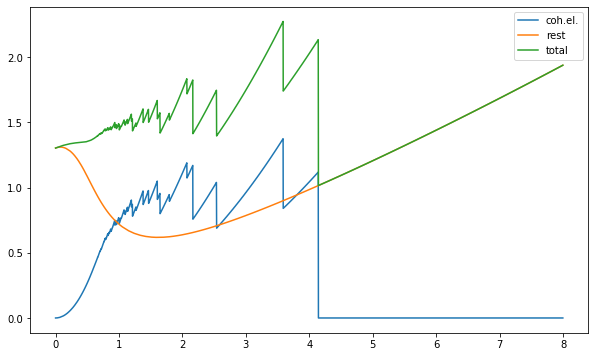

In [3]:
# Preparing reference spectra for fitting code.
gamma = data.StainlessSteel316L_Gamma()
alpha = data.StainlessSteel316L_Alpha()

phase_spectrum = gamma[:,0]
phase1lac = gamma[:,1]+gamma[:,2]
phase2lac = alpha[:,1]+alpha[:,2]

plt.figure(figsize=(10,6))
plt.plot(gamma[:,0],gamma[:,1],label='coh.el.')
plt.plot(gamma[:,0],gamma[:,2],label='rest')
plt.plot(gamma[:,0],gamma[:,1]+gamma[:,2],label='total')
plt.legend()
plt.show()
plt.close()

# Data fitting
Data is now ready for fitting. We fit both using 2 phases linear combination (-α,-γ). For demonstration we also test the three phases combination (-α,-γ,-ε), this is however not physically explained yet. Possibly different texture effects are captured by this method.

We first test on a single pixel to make sure that code works, then proceed on full image fitting.

## Two Phases

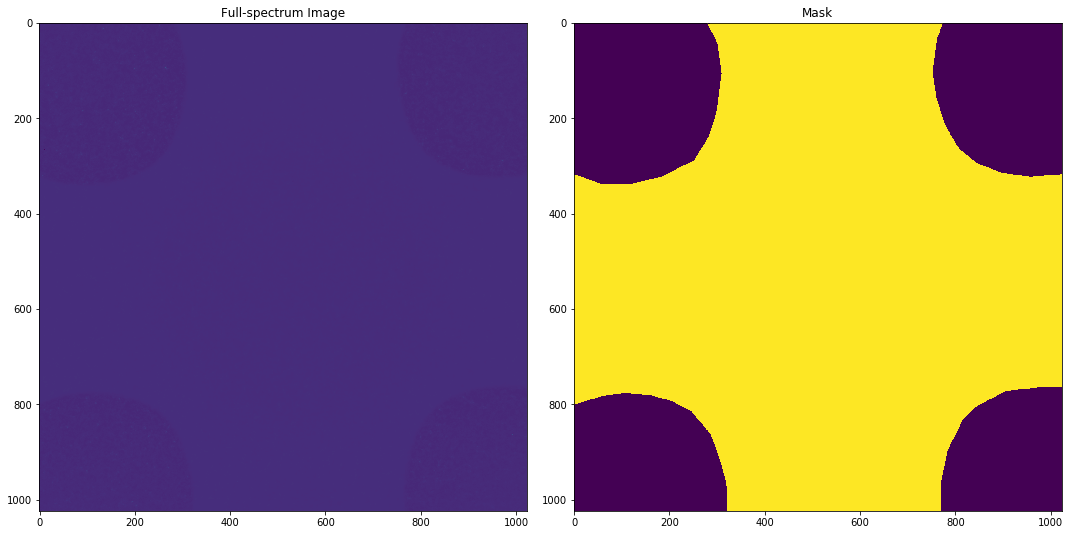

phase fraction (ph1 %) =  79.50519374949215 %


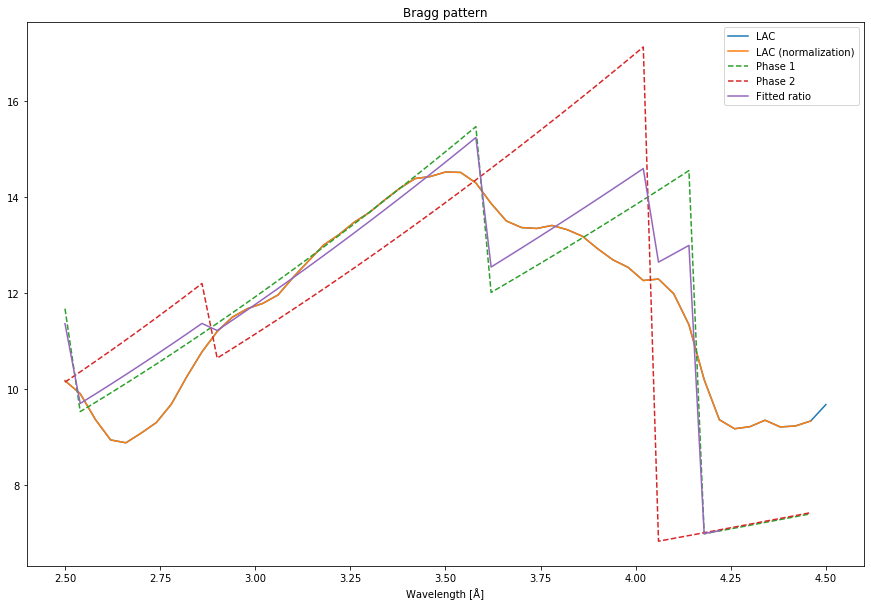

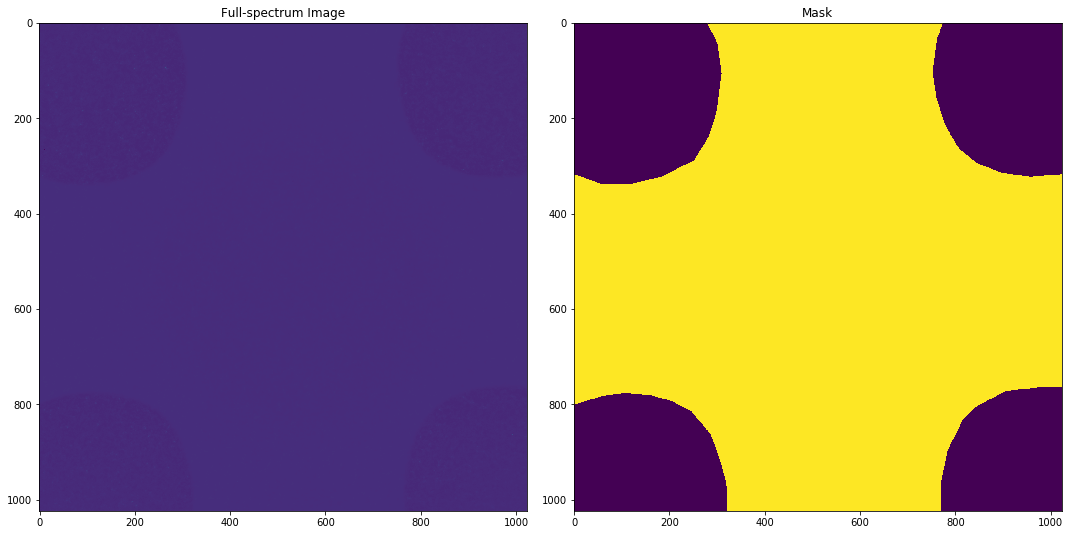

phase fraction (ph1 %) =  66.12822211371629 %


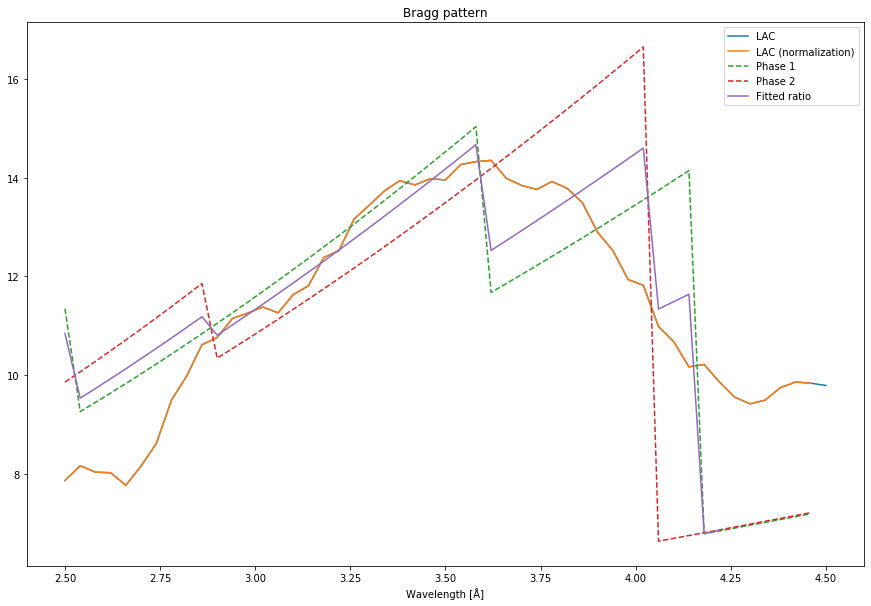

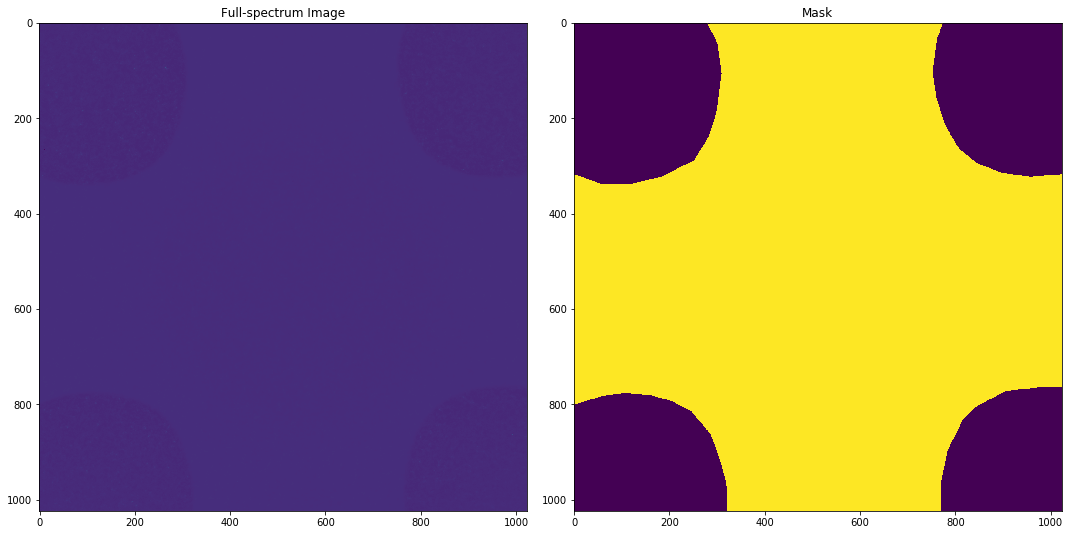

phase fraction (ph1 %) =  67.80951005916626 %


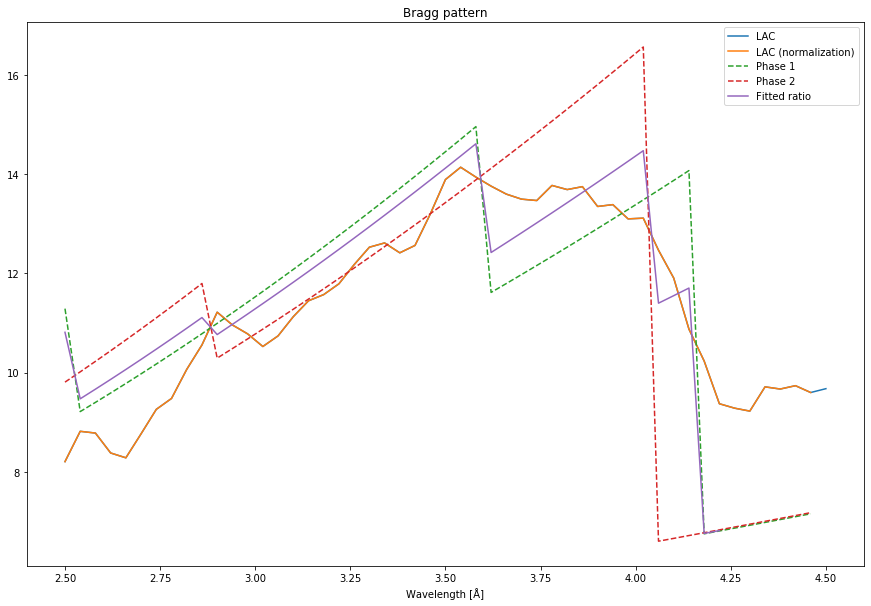

In [4]:
lambda_range_norm=[2.5, 4.5]
lambda_range_edges=[2.5, 4.25]
method = 'lmsquare'
SG_w = 3
SG_n = 1

pixel=[500,100]
pfit.PhaseRatioLinearCombination2D(T,spectrum,
                                        phase1lac,phase2lac,phase_spectrum,
                                        lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        bool_print=0,debug_idx=pixel)
pixel=[500,300]
pfit.PhaseRatioLinearCombination2D(T,spectrum,
                                        phase1lac,phase2lac,phase_spectrum,
                                        lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        bool_print=0,debug_idx=pixel)
pixel=[500,500]
pfit.PhaseRatioLinearCombination2D(T,spectrum,
                                        phase1lac,phase2lac,phase_spectrum,
                                        lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        bool_print=0,debug_idx=pixel)

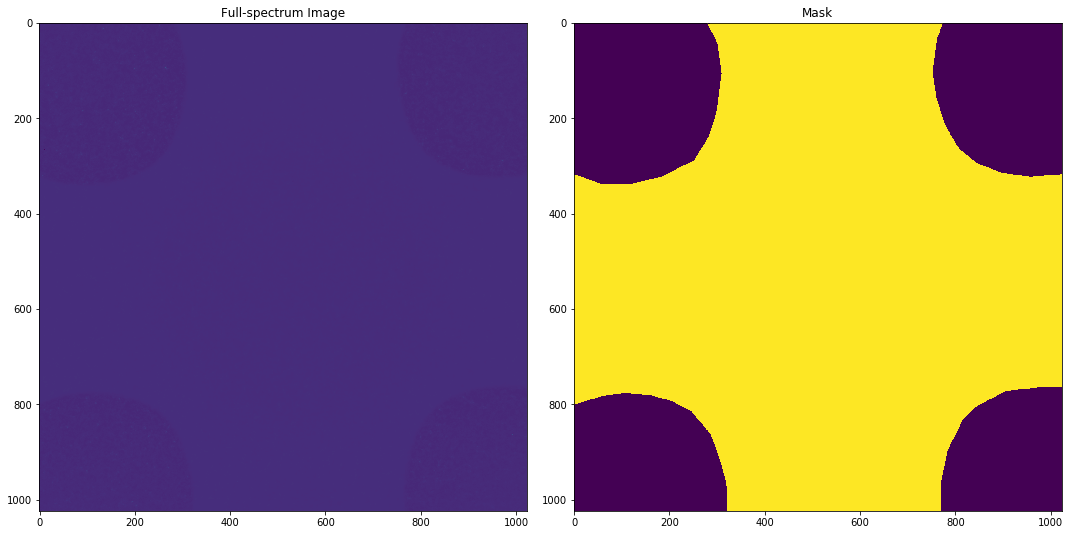

100%|██████████████████████████████████████| 1024/1024 [55:57<00:00,  3.28s/it]


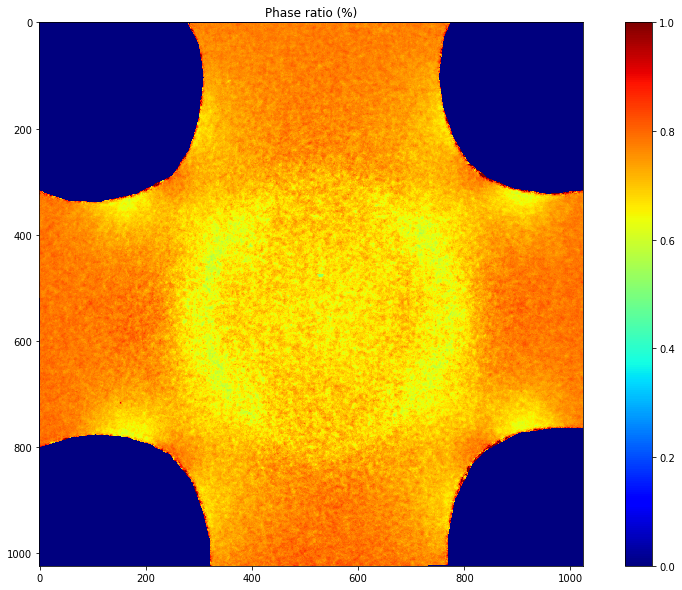

In [5]:
fit_2phase = pfit.PhaseRatioLinearCombination2D(T,spectrum,phase1lac,phase2lac,
                                        phase_spectrum,lambda_range_norm,lambda_range_edges,mask = mask,
                                        method=method,bool_SG=True,SG_w=SG_w,SG_n=SG_n,
                                        bool_print=1)